In [1]:
import sys
import gzip
import pickle
import gzip

from matplotlib import pyplot as plt
import numpy as np

if "./.." not in sys.path:
    sys.path.append("./..")
from deepfold.data.data_pipeline import convert_monomer_features, add_assembly_features, feature_processing_multimer, pad_msa
from deepfold.data.parsers import parse_hhr
from deepfold.runner.plot import plot_msa
from deepfold.common import residue_constants as rc

aatype [1770, 21]
between_segment_residues [1770]
domain_name [1]
residue_index [1770]
seq_length [1770]
sequence [1]
deletion_matrix_int [10970, 1770]
msa [10970, 1770]
num_alignments [1770]
msa_species_identifiers [10970]
template_aatype [20, 1770, 22]
template_all_atom_mask [20, 1770, 37]
template_all_atom_positions [20, 1770, 37, 3]
template_domain_names [20]
template_sequence [20]
template_sum_probs [20, 1]


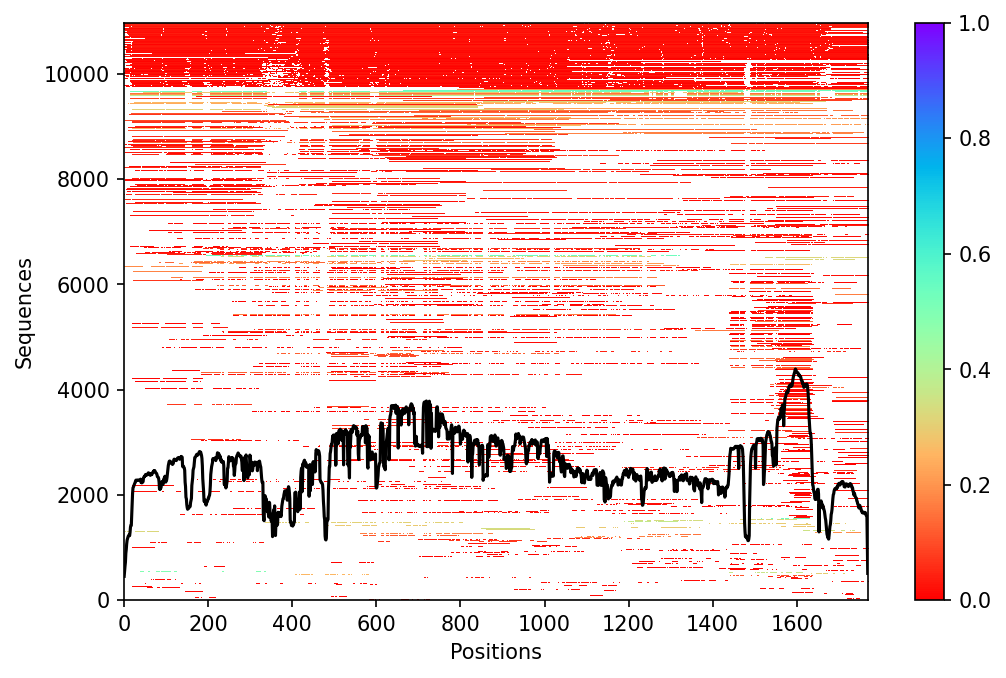

In [2]:
with gzip.open("/gpfs/deepfold/casp/casp16/T1210/features/features_af.pkz", "rb") as fp:
    feat = pickle.load(fp)
for key, arr in feat.items():
    print(key, list(arr.shape))

fig = plot_msa(feat)
plt.show(fig)
plt.close(fig)

# Non-Paring

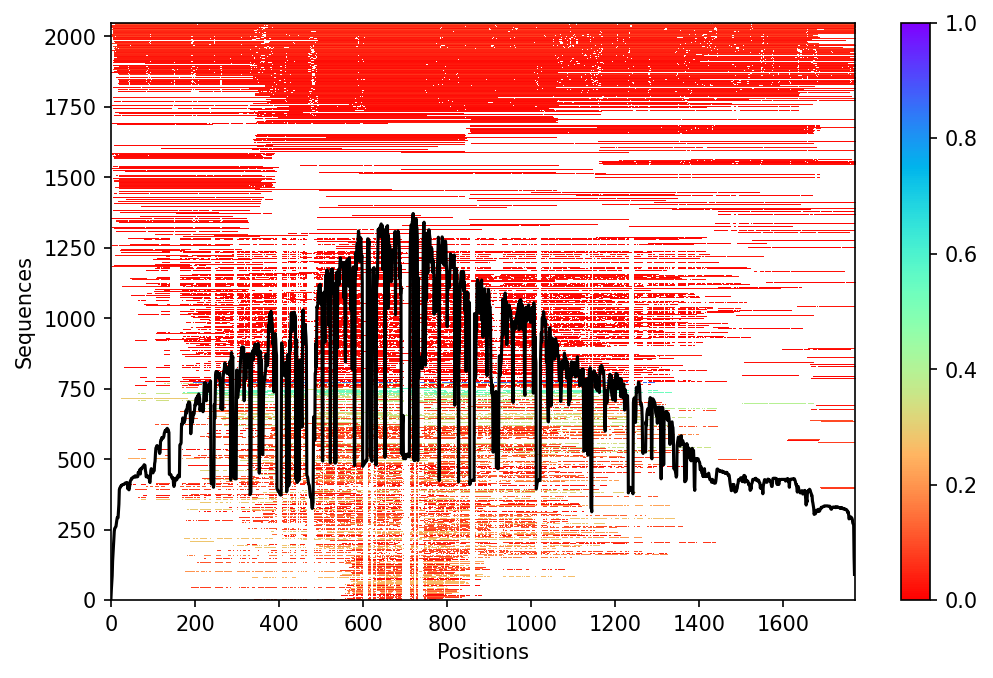

In [3]:
all_chain_features = {}

with gzip.open(f"/gpfs/deepfold/casp/casp16/T1210/features/features_af.pkz", "rb") as fp:
    chain_A = pickle.load(fp)
# with gzip.open(f"/gpfs/deepfold/casp/casp16/H0215/T0215s2/features/features_c2.pkz", "rb") as fp:
#     chain_B = pickle.load(fp)

chain_1 = convert_monomer_features(chain_A, chain_id="A")
# chain_2 = convert_monomer_features(chain_B, chain_id="B")

all_chain_features["A"] = chain_1
# all_chain_features["B"] = chain_2

add_chain_features = add_assembly_features(all_chain_features)

np_example = feature_processing_multimer.pair_and_merge(all_chain_features, non_pair=True)

np_example = pad_msa(np_example, 512)

with gzip.open("features_afm.pkz", "wb") as fp:
    pickle.dump(np_example, fp)

fig = plot_msa(np_example)
plt.show(fig)
plt.close(fig)

In [40]:
for k, v in np_example.items():
    print(k, v.shape)

aatype (646,)
residue_index (646,)
seq_length ()
msa (4096, 646)
num_alignments ()
template_aatype (4, 646)
template_all_atom_mask (4, 646, 37)
template_all_atom_positions (4, 646, 37, 3)
asym_id (646,)
sym_id (646,)
entity_id (646,)
deletion_matrix (4096, 646)
deletion_mean (646,)
all_atom_mask (646, 37)
all_atom_positions (646, 37, 3)
assembly_num_chains ()
entity_mask (646,)
num_templates ()
cluster_bias_mask (4096,)
bert_mask (4096, 646)
seq_mask (646,)
msa_mask (4096, 646)


In [41]:
chain_1["template_domain_names"]

array([b'7tl5_A', b'2cfu_A', b'2yhe_D', b'4nur_A', b'4pdx_A', b'8d2z_A',
       b'6uxu_B', b'2vw8_A', b'7r3e_B', b'6ao1_D', b'2zo4_A', b'5nde_A',
       b'5acs_B', b'6v3q_A', b'1znb_A', b'6jv4_D', b'1m2x_C', b'6v71_A',
       b'7luu_A', b'5wcm_A'], dtype=object)

In [42]:
chain_2["template_domain_names"]

array([b'2yhe_D', b'8d2z_B', b'4nur_B', b'4pdx_B', b'7tl5_B', b'2cfu_A',
       b'5a23_A', b'6uxu_B', b'6ao1_D', b'2vw8_A', b'7r3e_B', b'1znb_A',
       b'1a7t_A', b'5nde_A', b'1kr3_B', b'2bmi_A', b'5ndb_A', b'2zo4_A',
       b'1m2x_C', b'1bc2_A'], dtype=object)

In [43]:
chain_1["template_aatype"][1]

array([21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 18,  7, 10, 13,  6, 19,  0,  6,  7,  9, 18,  5, 19,  1,
        7, 13, 10,  0,  2,  9, 16, 13,  9,  1,  7,  3, 15,  7, 17,  9, 19,
       19,  3, 16, 10, 16, 16, 14,  0, 16,  0,  1,  0,  0, 18,  6, 10, 19,
       15,  1,  6, 10,  7,  6,  1, 14,  9,  1, 16, 19,  9, 18, 15,  8,  0,
        8,  0,  3,  8, 13,  7,  7, 19,  1,  7, 10, 19,  6, 14,  0, 19,  5,
        9,  9,  0, 14,  0,  7, 13, 12,  6,  0,  0,  9, 11,  6,  2,  7, 10,
       15, 10, 10,  0, 14, 16,  1, 10,  9,  6,  7,  6,  7,  6,  3, 10, 19,
       10,  3,  7, 19, 14, 13, 16, 13,  5,  2, 21, 16, 14,  7,  6, 15, 14,
        0,  6, 12,  2,  9, 17, 10, 14,  1,  5, 11,  0, 10, 10, 12,  0,  6,
        2, 19, 19,  7, 16, 10,  8, 10, 18, 16, 10,  1, 19,  1,  3,  0, 10,
        7, 17, 15, 11, 18,  9,  2,  5,  0, 10,  8,  1,  5,  0,  6, 19, 12,
       13,  0, 19,  8,  2

In [44]:
chain_2["template_aatype"][0]

array([11,  1,  7, 10,  9,  0, 14, 13,  0, 18,  5, 13, 10,  0,  3,  2,  2,
        9,  0,  7, 10, 13,  6, 19, 12, 14, 11, 10, 18,  5, 19,  1,  7, 10,
       14,  0,  2, 12, 16,  9,  9,  6,  7,  3, 15,  7, 10, 19, 10,  9,  3,
       16, 10, 16, 16,  0,  6, 16,  0,  1,  0,  0, 10,  3, 10, 18, 13,  5,
        8,  1, 14, 11, 11, 14,  9, 19,  0, 19, 19, 18, 15,  8, 15,  8,  9,
        3,  8, 13,  7,  7,  0,  1,  7,  9,  9,  7, 11, 19, 11, 19, 13,  0,
       14, 15,  7, 13, 12,  6,  8,  0, 19, 15,  2,  0, 16,  2, 16, 10, 19,
        0, 14,  2, 19, 10,  9,  6, 11, 14, 18,  6,  1,  8, 16, 19,  3,  7,
       19,  6, 10,  6, 13,  5, 10, 16, 10,  7, 15,  6,  0, 14, 15,  3, 12,
        2,  9, 18, 10, 14,  5, 13, 11, 19, 10,  2, 16,  0,  3,  2,  0, 14,
       14,  0, 12,  8,  2, 10, 10,  6, 19,  1,  3,  0, 11,  0, 17,  0,  7,
       18,  9,  3,  0, 15, 10,  6, 11,  1, 16,  3, 19, 10,  9,  5,  5,  8,
        2, 17, 14, 19,  7,  7,  3, 11, 10,  0,  3,  5,  1,  3, 12, 18,  0,
       13, 10,  2,  2,  1

In [45]:
np_example["template_aatype"][0]

array([21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21,  7,  7, 10, 13, 11, 19, 16,  3,  7, 19, 18,  5,  9,  1,
        2, 10, 10, 15,  2, 12, 16,  9,  9,  6,  7, 11, 16,  7,  9, 16, 19,
        9,  3, 14, 10, 10, 15,  0,  6, 14,  0, 11,  6,  0, 10,  0, 10, 18,
       13,  0,  8,  1, 14, 11, 11, 14, 19, 19,  0, 19, 10, 13, 16,  8, 15,
        8, 19,  3,  8, 18,  7,  7,  9,  1,  7, 19, 19,  3,  6, 11, 19, 11,
        9, 18,  0, 14,  0,  7, 13, 12,  6,  6,  0, 19, 15,  6,  2,  7, 19,
       16, 10,  9, 14, 14, 16,  8, 18,  9, 16,  8, 16,  7,  5,  5,  6, 19,
        9,  3,  7, 10, 16, 18,  3, 13, 12, 12, 21,  0, 14,  7,  6,  0, 14,
       15,  6, 12, 10, 17, 18, 19, 11,  6, 11, 11, 12,  9,  6,  0,  0,  6,
        3, 19, 16,  8, 16, 10,  8, 16, 18, 15, 10,  1,  9,  1,  3, 14, 10,
        0, 17, 15, 11, 18,  9,  2,  0,  0,  9,  3,  1,  6,  0,  6, 19,  9,
        9,  0,  5,  8,  8

In [33]:
# "".join(rc.restypes_with_x_and_gap[x] for x in feat["template_aatype"][0])
"".join(rc.ID_TO_HHBLITS_AA[x] for x in feat["template_aatype"][0])

'-------------------------------------IIMQNYTEIYWGLCDMMSDPTLLHINTILTYLERMMSAHRANHAMAMWQAKCRNNRYYAYMQTKSKYEKWIILCIYYEHNYNLWARAIQPHHAYSHDIYTMLRRTKWLTKTIGGHYLEIMTWEQPP-ARIHARSHPMVWYNHNNPLHAAHEYTKTMKTWSMCLCERMAVSNWLDAALECHAHYLLAGKKVRTIDEMPNIGCEPWCWLDEGTMCPADMIPTCEHLAADQNMR-ESMHNGVSSC--IWWISYSKEYNATWYQW-M-IVQEITMEHMRRHGAANNQYHWPIIA-------------------WIMQHYAHILWGYCIQMADLTQLCIESIVLYYETMTTRATACAAWHMYSCHMIHCRLCTYLWSKAKAEKQIIYCIMYHAYGLLARAIQPHAALNHDMRSMMARTCMLHIHIHEMYMEIYRQTQGD-TRITSRAHPDLVMRCGNAMMPAHDYYITMWTMAHYCEAMIVSNWLDGAMKCGAHYPQAYKDVRCIYHYMHNGCEMWIWMKEGTMKMADGIYTLIGYKDCMC--MRRSMEGHVWECIWKI--SYSKDACAYMDCW-M-IWWEIDRAT----------------------------'

In [30]:
"".join(rc.ID_TO_HHBLITS_AA[x] for x in chain_1["template_aatype"][1])

'-------------------------------------WIMQHYAHILWGYCIQMADLTQLCIESIVLYYETMTTRATACAAWHMYSCHMIHCRLCTYLWSKAKAEKQIIYCIMYHRAYGLLARAIQPHAALNHDIMSMMARTCMLHIHIHEMYMEIYRQTQGD-TRIHSRAHPDLVMRCGNAMMPAHDYYITMKMWTMCYCEAMIVSNWLDGAMKCGAHYPQAYKDVRCIDAYMHNGCEMWIWMKEGTMKMADGIYTLIGYKDCMCMR-RSMEGHVWEC--IWKISYSKDACAYMDCW-M-IWWEITMERMSRHESAICWYHWPIIA-'

In [46]:
with gzip.open("features_afm.pkz", "rb") as fp:
    feat = pickle.load(fp)
for key, arr in feat.items():
    print(key, list(arr.shape))

aatype [646]
residue_index [646]
seq_length []
msa [4031, 646]
num_alignments []
template_aatype [4, 646]
template_all_atom_mask [4, 646, 37]
template_all_atom_positions [4, 646, 37, 3]
asym_id [646]
sym_id [646]
entity_id [646]
deletion_matrix [4031, 646]
deletion_mean [646]
all_atom_mask [646, 37]
all_atom_positions [646, 37, 3]
assembly_num_chains []
entity_mask [646]
num_templates []
cluster_bias_mask [4031]
bert_mask [4031, 646]
seq_mask [646]
msa_mask [4031, 646]


In [47]:
with gzip.open("features_crf.pkz", "rb") as fp:
    crf = pickle.load(fp)

for key, arr in crf.items():
    print(key, list(arr.shape))

aatype [646]
residue_index [646]
seq_length []
msa [4096, 646]
num_alignments []
template_aatype [4, 646]
template_all_atom_mask [4, 646, 37]
template_all_atom_positions [4, 646, 37, 3]
asym_id [646]
sym_id [646]
entity_id [646]
deletion_matrix [4096, 646]
deletion_mean [646]
all_atom_mask [646, 37]
all_atom_positions [646, 37, 3]
assembly_num_chains []
entity_mask [646]
num_templates []
cluster_bias_mask [4096]
bert_mask [4096, 646]
seq_mask [646]
msa_mask [4096, 646]


In [49]:
feat["template_aatype"] = crf["template_aatype"]
feat["template_all_atom_mask"] = crf["template_all_atom_mask"]
feat["template_all_atom_positions"] = crf["template_all_atom_positions"]

with gzip.open("features_cfm.pkz", "wb") as fp:
    pickle.dump(feat, fp)